<h2><u>Task 2: Imbalanced Dataset <u><h2>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
import warnings
warnings.filterwarnings('ignore')
plt.close('all')
import time
start_time = time.time()
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,fbeta_score
from sklearn.metrics import f1_score
sns.set()

In [18]:
#%% Create dataframe
data = pd.read_csv("pulsar_stars.csv")
#view first 5 rows in df
data.head()
#presenting all columns, number of rows and type
data.info()
#feature statistics for numerical categories
data.describe()
#Majority class is 0 (Not a pulsar)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [19]:
cols = list(data.columns)
features = cols
features.remove('target_class')
# Normalization
X=data[features]
X = StandardScaler().fit_transform(X)
Y=data.target_class
#For this classification problem, I choose KNN 3 neighbors. 
model = KNeighborsClassifier(n_neighbors=3)

- Dummysampler is for measuring cross validation of the unbalanced data
- The Combine approach is called SMOTETomek, a class thats performs over-sampling using SMOTE and cleaning using Tomek links

In [20]:
class DummySampler:
    def sample(self, X, y):
        return X, y
    def fit(self, X, y):
        return self
    def fit_resample(self, X, y):
        return self.sample(X, y)
# prepare samplers
RUS=RandomUnderSampler()
ADASYN=ADASYN()
ROS= RandomOverSampler()
SMOTE=SMOTE()
Combine=SMOTETomek()
Samplers = []
Samplers.append(('Original', DummySampler()))
Samplers.append(('RUS', RUS))
Samplers.append(('ROS', ROS))
Samplers.append(('ADASYN', ADASYN))
Samplers.append(('SMOTE', SMOTE))
Samplers.append(('Combine', Combine))

The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in dataset. However, in the case of imbalanced classes this metric can be misguiding, as high metrics doesn’t show prediction capacity for the minority class.

I will now compare the results of the different models on the validation set using the following models:
- Accuracy*
- F1 Measure
- Precision
- Recall
- ROC-AUC

*Precision is an unsuitable measure of this problem, below I will explain the reasons why



****************accuracy**************
-----------Original---------
The number of samples in  Original  dataset is 17898
0    16259
1     1639
Name: target_class, dtype: int64
Ratio samples in  Original  dataset target values is 0.101
cross validation score -  Original: 0.978212 (0.011018)
-----------RUS---------
The number of samples in  RUS  dataset is 3278
1    1639
0    1639
Name: target_class, dtype: int64
Ratio samples in  RUS  dataset target values is 1.0
cross validation score -  RUS: 0.932765 (0.027173)
-----------ROS---------
The number of samples in  ROS  dataset is 32518
1    16259
0    16259
Name: target_class, dtype: int64
Ratio samples in  ROS  dataset target values is 1.0
cross validation score -  ROS: 0.923111 (0.013672)
-----------ADASYN---------
The number of samples in  ADASYN  dataset is 32378
0    16259
1    16119
Name: target_class, dtype: int64
Ratio samples in  ADASYN  dataset target values is 0.991
cross validation score -  ADASYN: 0.890682 (0.016054)
--------

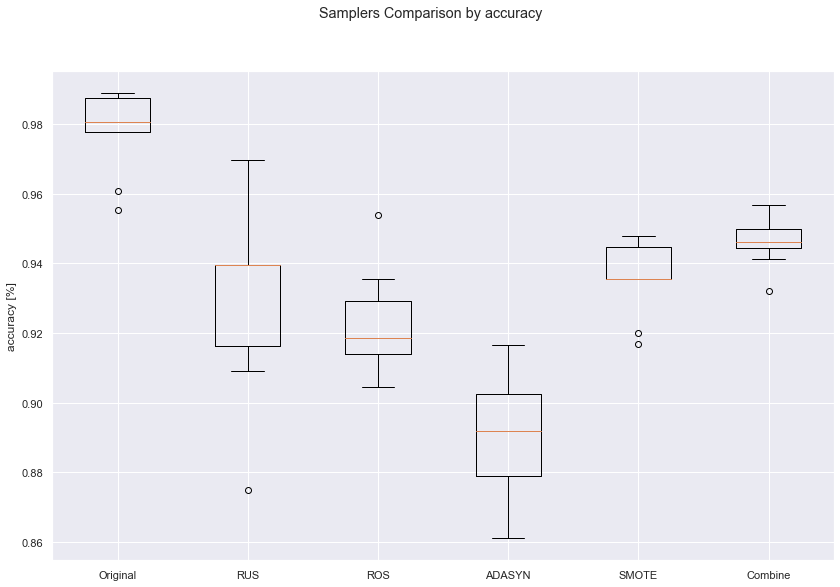

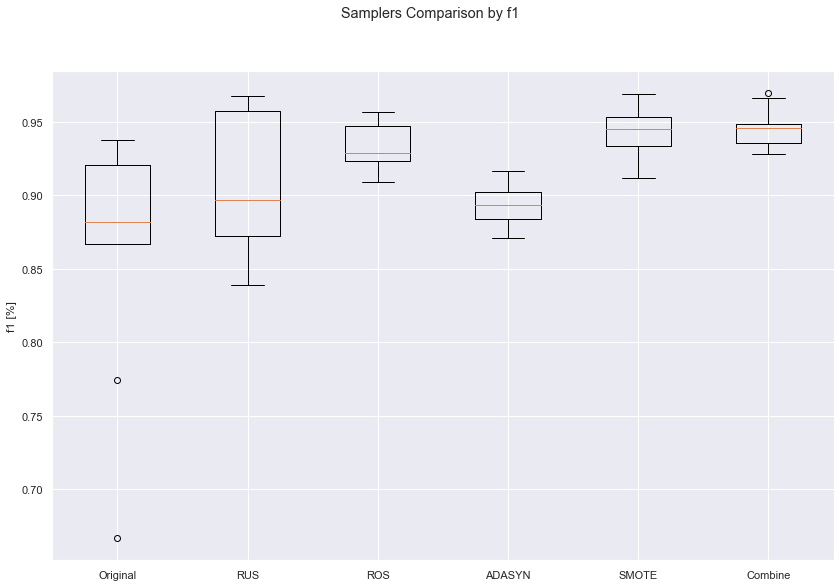

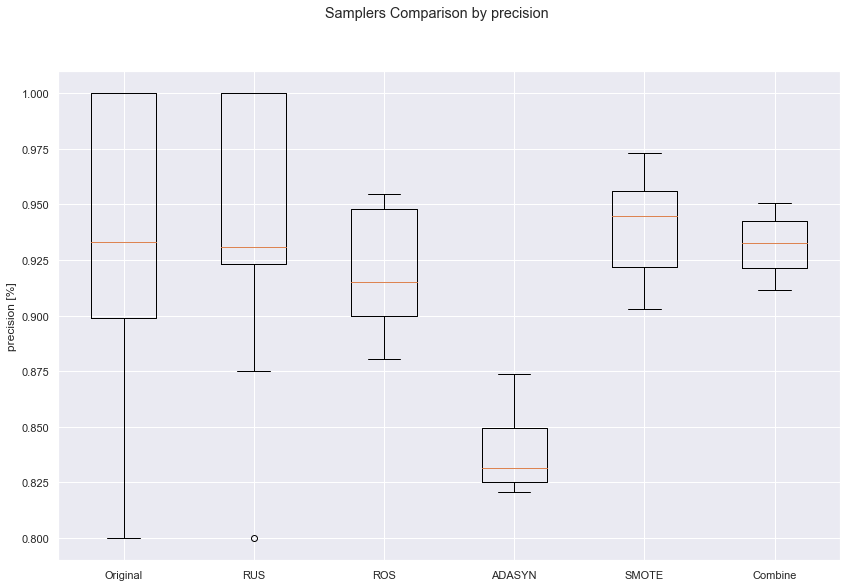

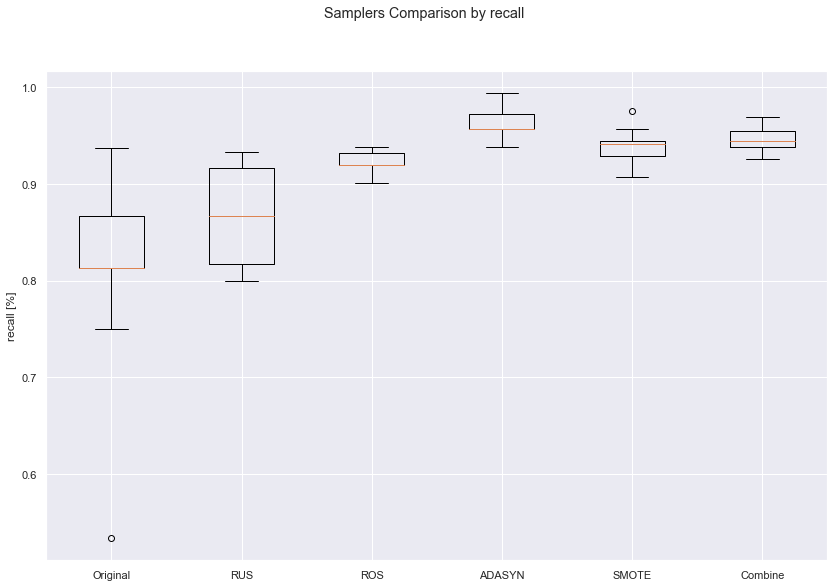

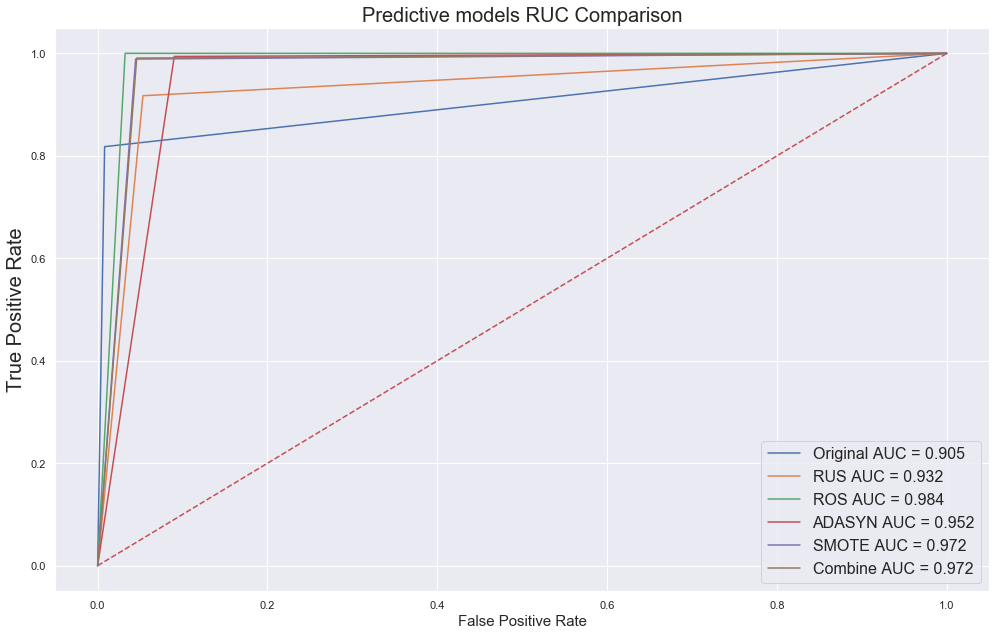

In [21]:
# evaluate each sampler in turn
score = ['accuracy', 'f1',"precision","recall"] #Different measures
RANDOM_STATE=0
for scoring in score:
    print("****************"+scoring+"**************")
    results = []
    names = []
    predictions=[]
    f1_score_tot=[];f2_score_tot=[]
    fpr_tot=[];tpr_tot=[];roc_auc_tot=[]
    for name, sampler in Samplers:
        print("-----------"+name+"---------")
        X_sampled, Y_sampled = sampler.fit_resample(X,Y)
        print("The number of samples in ",name," dataset is" ,X_sampled.shape[0])
        print(Y_sampled.value_counts())
        print("Ratio samples in ",name," dataset target values is",round(Y_sampled.value_counts()[1]/Y_sampled.value_counts()[0],3))
#Now I will randomly split the data so that 10% is saved for validation and 90% for training and test
        X_train_test, X_val, Y_train_test, Y_val =train_test_split(X_sampled, Y_sampled, test_size=0.1, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X_train_test, Y_train_test, test_size=0.2, random_state=42)

        cv_results = cross_val_score(model, X_val, Y_val,cv=10, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print("cross validation score - ",msg)
        
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        predictions.append(y_pred)
        probs= model.predict_proba(X_test)
        preds = probs[:,1]
        #F2 score
        f1_measure=f1_score(y_test, y_pred)
        f1_score_tot.append(f1_measure)
        f2_score=fbeta_score(y_test, y_pred, beta=2)
        f2_score_tot.append(f2_score)
        #ROC-AUC
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        fpr_tot.append(fpr);tpr_tot.append(tpr);roc_auc_tot.append(roc_auc)
#    print(classification_report(y_test, model.predict(X_test),target_names=["no","yes"]))
#    CM=confusion_matrix(y_test, y_pred)
#    print(pd.DataFrame(CM, index = ["Predicted No","Predicted Yes"],
#              columns = ["Actual No","Actual Yes"]))
    # boxplot algorithm comparison
    fig1 = plt.figure(figsize=(14, 9))
    plt.tight_layout()
    fig1.suptitle('Samplers Comparison by '+scoring)
    ax1 = fig1.add_subplot(111)
    plt.boxplot(results)
    ax1.set_xticklabels(names)
    ax1.set_ylabel(scoring+" [%]")

plt.figure(figsize=(14, 9))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Predictive models RUC Comparison',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.tight_layout()
for i in range(len(names)):
    plt.plot(fpr_tot[i], tpr_tot[i], label = names[i]+' AUC = %0.3f' % roc_auc_tot[i])
    plt.legend(loc = 'lower right', prop={'size': 16})

Samplers comparison by accuracy:
As mention before, the accuracy of unbalanced data (Original) has very high accuracy, compare to balanced datasets, but also has a very low values at F1 measure, mainly because low recall (can be seen in boxplot 4 **"Samplers comparison by recall"**)

For any $\beta$ score the equation is: $$ F_\beta = (1+\beta^2)\cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}\equiv  \frac{(1+\beta^2)\cdot True Positive}{(1+\beta^2)\cdot True Positive+\beta^2 \cdot False Negative + False Positive}  $$

for F2, $\beta = 2 $, and so $$ F_2 = 5\cdot \frac{precision \cdot recall}{(4 \cdot precision) + recall}\equiv  \frac{5\cdot True Positive}{5\cdot True Positive+4 \cdot False Negative + False Positive}  $$
It can be seen that F2 measure weighs recall higher than precision (by placing more emphasis on false negatives). 
This makes the F2 score more suitable in certain applications where it’s more important to classify correctly as many positive samples as possible, rather than maximizing the number of correct classifications, as in our case.

In [22]:
pd.DataFrame(list(zip(f1_score_tot,f2_score_tot)),columns =['F1 measure', 'F2 measure'],index=names) .T

,Original,RUS,ROS,ADASYN,SMOTE,Combine
F1 measure,0.860759,0.93007,0.984297,0.954996,0.972783,0.972873
F2 measure,0.834502,0.92233,0.993659,0.977972,0.982330,0.983512


As a conclusion I would recommend to use accuracy only if the classes are perfectly balanced, and otherwise use F2 and ROC-AUC. It is also useful to see ratio of positives and negative estimation via precision and recall.

In [23]:
print("--- %s minutes ---" % (round(time.time()/60 - start_time/60,2)))

--- 0.24 minutes ---
